## ***Milestone*** ***2*** : Exploratory Analysis & Cluster Insights

In [ ]:
import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv("IT_Support_Cleaned.csv")

# view dataset
df.head(5)  # first 5 rows
print("Columns:", df.columns)
print("Number of rows and columns:", df.shape)
df.info()  # data types and missing values

Columns: Index(['Issue_Description', 'Department', 'Priority', 'Tags', 'Start_Time',
       'End_Time', 'Ticket_ID', 'Resolution_Hours', 'Priority_Score',
       'Ticket_Type', 'Cluster_ID'],
      dtype='object')
Number of rows and columns: (12563, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563 entries, 0 to 12562
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Issue_Description  12563 non-null  object 
 1   Department         12563 non-null  object 
 2   Priority           12563 non-null  object 
 3   Tags               12563 non-null  object 
 4   Start_Time         12563 non-null  object 
 5   End_Time           12563 non-null  object 
 6   Ticket_ID          12563 non-null  int64  
 7   Resolution_Hours   12563 non-null  float64
 8   Priority_Score     12563 non-null  int64  
 9   Ticket_Type        12563 non-null  object 
 10  Cluster_ID         12563 non-null  int64  
dtypes: float

In [ ]:
# Define mapping lists
request_tags = ['Account', 'Product', 'Billing', 'Feature', 'Inquiry', 'Marketing',
                'Documentation', 'Feedback', 'Finance', 'Compliance', 'Return',
                'Sales', 'Customer Service', 'Smart Home', 'Customer', 'HR',
                'Training', 'DigitalMarketing', 'Brand', 'Order', 'Medical',
                'Social', 'General', 'Business', 'Consulting Services']

problem_tags = ['Outage', 'Network', 'Bug', 'Disruption', 'Hardware', 'Crash',
                'Server', 'Software Bug', 'Device', 'Malware', 'Technical Support',
                'Service Outage', 'Network Issue', 'Billing Issue', 'Product Support']

incident_tags = ['Urgent', 'Critical Data Loss', 'Security', 'Breach',
                 'Data Discrepancy', 'Incident', 'Payment', 'Refund',
                 'Account Security', 'Service Disruption', 'Technical Guidance',
                 'Performance Tuning']

# Function to assign main Ticket_Type
def assign_ticket_type(tags):
    clean_tags = tags[1:-1].replace("'", "").split(',')  # remove brackets & quotes
    clean_tags = [t.strip() for t in clean_tags]
    for t in clean_tags:
        if t in request_tags:
            return 'Request'
        elif t in problem_tags:
            return 'Problem'
        elif t in incident_tags:
            return 'Incident'
    return 'Other'

df['Ticket_Type'] = df['Tags'].apply(assign_ticket_type)

## Ticket Distribution Analysis

We check how tickets are distributed by **Department**, **Priority**, and **Ticket Type**.


In [ ]:
# tickets by Department
department_counts = df['Department'].value_counts()
print(department_counts)

Department
Technical Support                  3625
Product Support                    2397
Customer Service                   1915
IT Support                         1468
Billing and Payments               1330
Returns and Exchanges               609
Service Outages and Maintenance     489
Sales and Pre-Sales                 357
Human Resources                     210
General Inquiry                     163
Name: count, dtype: int64


In [ ]:
# tickets by Priority
priority_counts = df['Priority'].value_counts()
print(priority_counts)

Priority
medium    5214
high      4834
low       2515
Name: count, dtype: int64


In [ ]:
# Tickets by Ticket_Type
ticket_type_counts = df['Ticket_Type'].value_counts()
print(ticket_type_counts)

Ticket_Type
Problem     5073
Request     4667
Incident    2561
Other        262
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Ticket Distribution by Priority

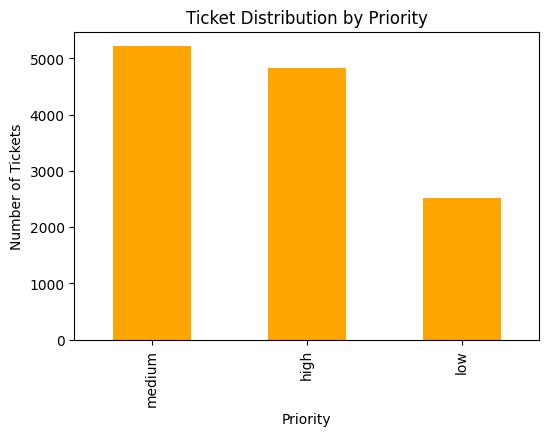

In [ ]:
# Bar chart: Tickets by Priority
plt.figure(figsize=(6,4))
priority_counts.plot(kind='bar', color='orange')
plt.title('Ticket Distribution by Priority')
plt.xlabel('Priority')
plt.ylabel('Number of Tickets')
plt.show()

Ticket Type Distribution

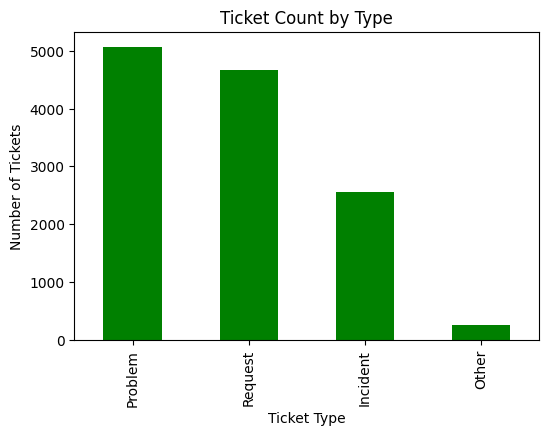

In [ ]:
# Bar chart: Tickets by Ticket Type
plt.figure(figsize=(6,4))
ticket_type_counts.plot(kind='bar', color='green')
plt.title('Ticket Count by Type')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets')
plt.show()

In [ ]:
# Top 10 Tags
from collections import Counter

all_tags = df['Tags'].str[1:-1].str.replace("'", "").str.split(',').sum()
all_tags = [t.strip() for t in all_tags]
top_tags = [tag for tag, count in Counter(all_tags).most_common(10)]
print("Top 10 Tags:", top_tags)


Top 10 Tags: ['Tech Support', 'IT', 'Performance', 'Documentation', 'Feedback', 'Bug', 'Security', 'Technical', 'Feature', 'Resolution']


Top Categories by Frequency

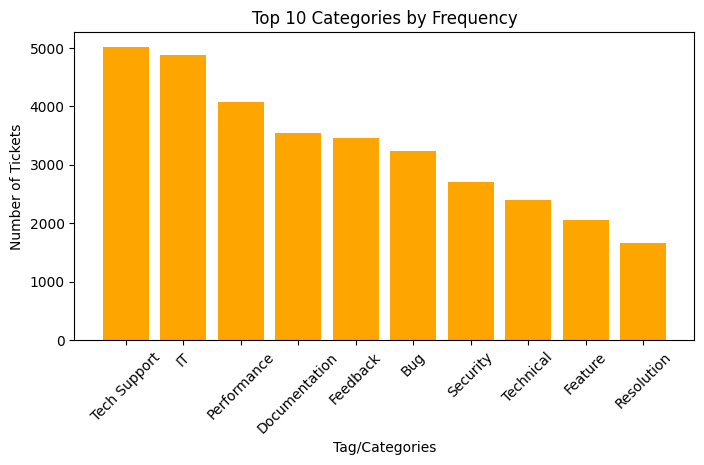

In [ ]:
# Bar chart: Top Tags
tag_counts = Counter(all_tags)
top_tag_counts = {tag: tag_counts[tag] for tag in top_tags}

plt.figure(figsize=(8,4))
plt.bar(top_tag_counts.keys(), top_tag_counts.values(), color='orange')
plt.title('Top 10 Categories by Frequency')
plt.xlabel('Tag/Categories')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()

Tickets by Queue / Assigned Team

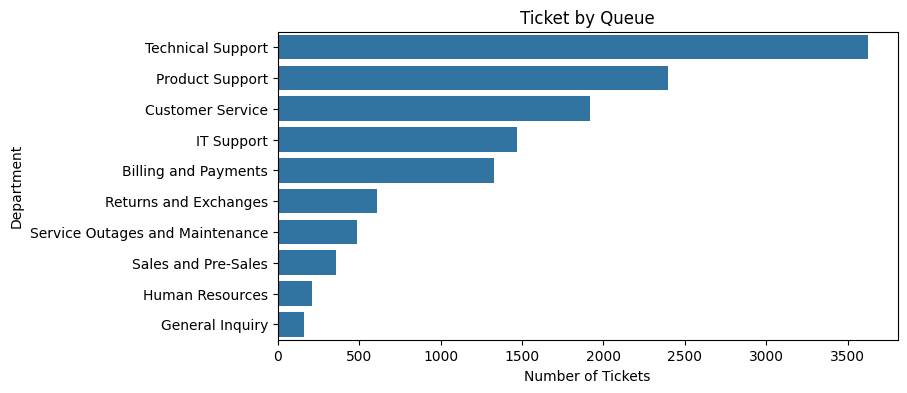

In [ ]:
# Bar chart for ticket count by team
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='Department', order=df['Department'].value_counts().index)
plt.title('Ticket by Queue')
plt.xlabel('Number of Tickets')
plt.ylabel('Department')
plt.show()

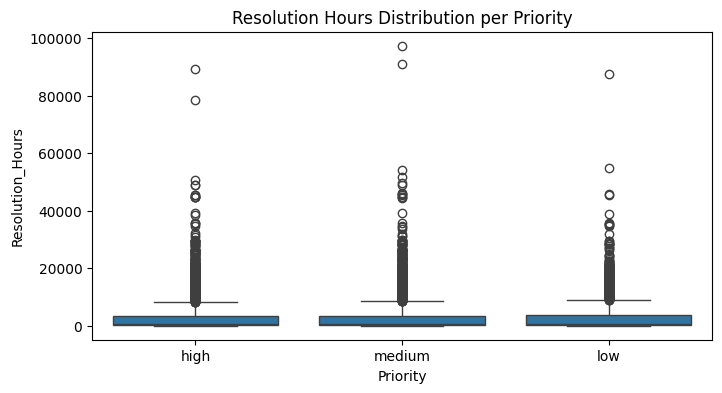

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Priority', y='Resolution_Hours', data=df)
plt.title('Resolution Hours Distribution per Priority')
plt.show()

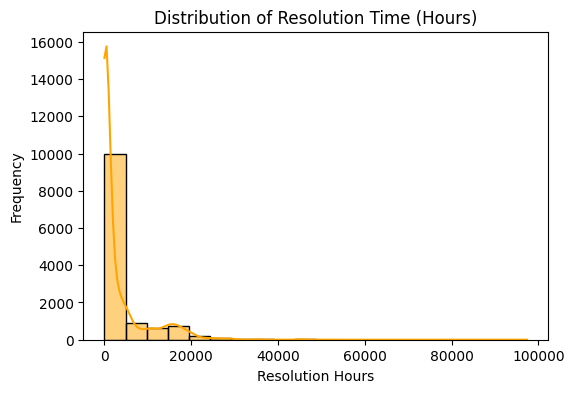

In [ ]:
# Histogram for Resolution Hours
plt.figure(figsize=(6,4))
sns.histplot(df['Resolution_Hours'], bins=20, kde=True, color='orange')
plt.title('Distribution of Resolution Time (Hours)')
plt.xlabel('Resolution Hours')
plt.ylabel('Frequency')
plt.show()

##Clustering Insights & Text Similarity

In [ ]:
# We will use Issue_Description for similarity
df['Issue_Description'].isnull().sum()

np.int64(0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=500
)

# Convert text to numeric vectors
tfidf_matrix = tfidf.fit_transform(df['Issue_Description'])
tfidf_matrix.shape

(12563, 500)

In [ ]:
# Import KMeans for clustering
from sklearn.cluster import KMeans

In [ ]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans and assign Cluster_ID
df['Cluster_ID'] = kmeans.fit_predict(tfidf_matrix)

# Check how many tickets in each cluster
df['Cluster_ID'].value_counts()

,count
Cluster_ID,
4,5790
1,2132
2,1765
3,1440
0,1436


In [ ]:
#tickets with cluster assignment
df[['Ticket_ID', 'Ticket_Type', 'Issue_Description', 'Cluster_ID']].head(10)

,Ticket_ID,Ticket_Type,Issue_Description,Cluster_ID
0,186,Request,"Dear Customer Support Team,I am writing to rep...",4
1,190,Request,"Dear Customer Support Team,I hope this message...",2
2,198,Request,"Dear Customer Support Team,I hope this message...",2
3,209,Request,"Dear Support Team,I hope this message reaches ...",2
4,217,Request,"Dear Customer Support,I hope this message reac...",2
5,221,Problem,"Dear Customer Support Team,I am submitting a r...",4
6,229,Problem,"Dear Support Team,I am reporting a recurring i...",4
7,230,Problem,"Customer Support,We are encountering a disrupt...",4
8,236,Problem,"Dear Customer Support Team,I am submitting a r...",4
9,243,Request,"Dear Customer Support Team,I hope this message...",2


In [ ]:
#number of tickets in each cluster
cluster_size = df['Cluster_ID'].value_counts().sort_index()
print("Tickets per Cluster:\n", cluster_size)

Tickets per Cluster:
 Cluster_ID
0    1436
1    2132
2    1765
3    1440
4    5790
Name: count, dtype: int64


In [ ]:
#tickets of each Ticket_Type in each cluster
cluster_ticket_type = df.groupby(['Cluster_ID','Ticket_Type']).size().unstack(fill_value=0)
print(cluster_ticket_type)

Ticket_Type  Incident  Other  Problem  Request
Cluster_ID                                    
0                   7     31       75     1323
1                2033      1       52       46
2                  72     37      228     1428
3                  10     50      440      940
4                 439    143     4278      930


In [ ]:
# Average resolution time per cluster
cluster_resolution = df.groupby('Cluster_ID')['Resolution_Hours'].mean()
print(cluster_resolution)

Cluster_ID
0    3826.227325
1    4055.466760
2    3226.443658
3    3827.428137
4    3024.182612
Name: Resolution_Hours, dtype: float64


Cluster Size Visualization

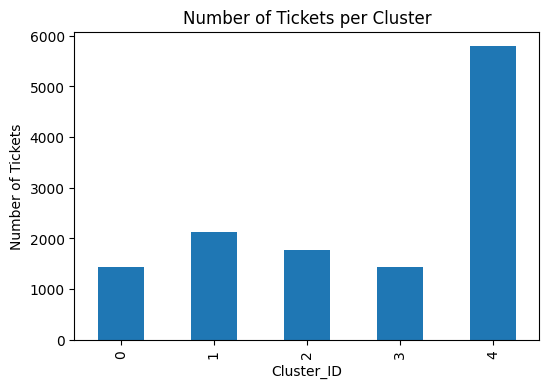

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
cluster_size.plot(kind='bar')
plt.title('Number of Tickets per Cluster')
plt.xlabel('Cluster_ID')
plt.ylabel('Number of Tickets')
plt.show()

Cluster vs Ticket Type

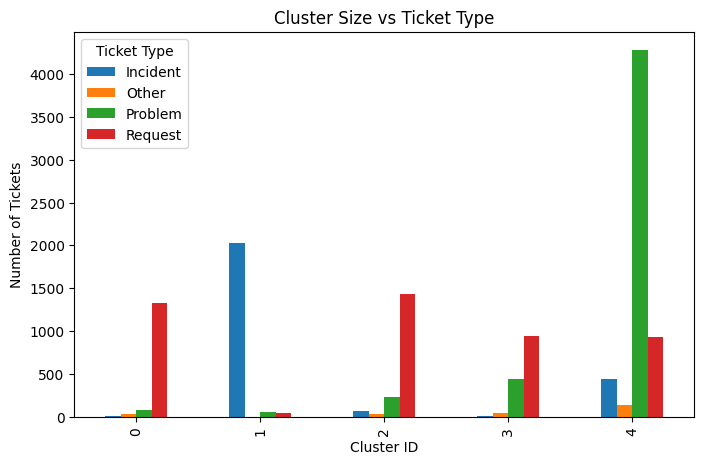

In [ ]:
cluster_ticket_type = df.groupby(['Cluster_ID','Ticket_Type']).size().unstack(fill_value=0)

cluster_ticket_type.plot(kind='bar', stacked=False, figsize=(8,5))
plt.title('Cluster Size vs Ticket Type')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Tickets')
plt.legend(title='Ticket Type')
plt.show()


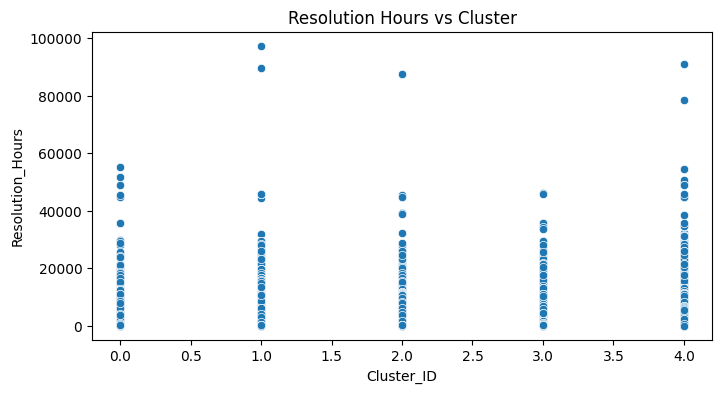

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Cluster_ID', y='Resolution_Hours', data=df)
plt.title('Resolution Hours vs Cluster')
plt.show()

Similarity Score (Cluster Quality)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_matrix = cosine_similarity(tfidf_matrix)


In [ ]:
def avg_cluster_similarity(cluster_id):
    idx = df[df['Cluster_ID'] == cluster_id].index
    if len(idx) <= 1:
        return 0
    sim = similarity_matrix[np.ix_(idx, idx)]
    return np.mean(sim)


In [ ]:
cluster_similarity = {
    cid: avg_cluster_similarity(cid)
    for cid in df['Cluster_ID'].unique()
}

cluster_similarity


{np.int32(4): np.float64(0.08657123053543864),
 np.int32(2): np.float64(0.13716242695631162),
 np.int32(0): np.float64(0.19029173323203252),
 np.int32(3): np.float64(0.17629687429960972),
 np.int32(1): np.float64(0.18810174409856287)}

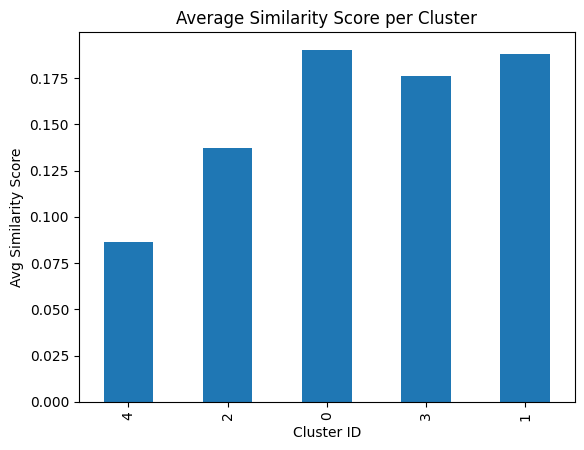

In [ ]:
pd.Series(cluster_similarity).plot(kind='bar')
plt.title('Average Similarity Score per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Avg Similarity Score')
plt.show()


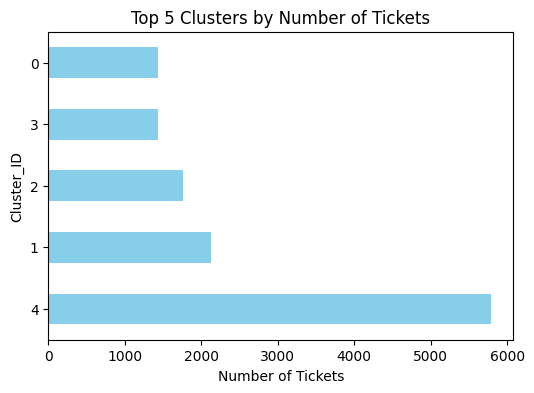

In [ ]:
top_clusters = cluster_size.sort_values(ascending=False).head(5)
top_clusters.plot(kind='barh', figsize=(6,4), color='skyblue')
plt.title('Top 5 Clusters by Number of Tickets')
plt.xlabel('Number of Tickets')
plt.ylabel('Cluster_ID')
plt.show()

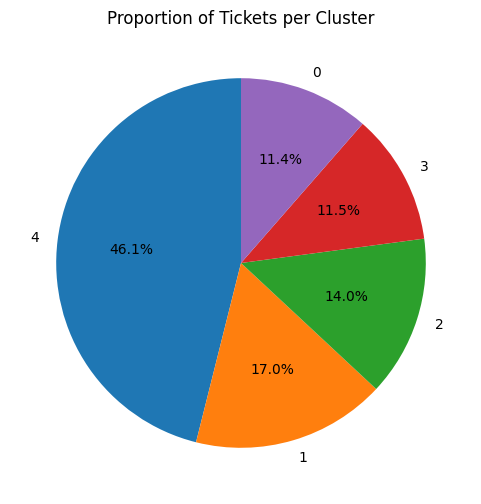

In [ ]:
plt.figure(figsize=(6,6))
df['Cluster_ID'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Tickets per Cluster')
plt.ylabel('')
plt.show()

In [ ]:
df.to_csv("IT_Support_Cleaned.csv", index=False)
